# Importing the Required Packages

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Importing the Feeds Data and Cleaning the data

In [6]:
df=pd.read_csv("VN0100.csv")

In [5]:
df.head()

,created_at,entry_id,field1,field2,field3,field4,field5,latitude,longitude,elevation,status
0,1970-01-01 05:40:00 IST,1,22.75,0.00,0.00,0.00,13.12,NaN,NaN,NaN,NaN
1,1970-01-01 05:50:01 IST,2,22.31,0.00,0.26,0.28,12.73,NaN,NaN,NaN,NaN
2,2020-12-17 00:29:38 IST,3,22.13,0.18,72.43,76.64,3.74,NaN,NaN,NaN,NaN
3,2020-12-17 00:39:39 IST,4,22.19,0.18,72.72,76.85,3.79,NaN,NaN,NaN,NaN
4,2020-12-17 00:49:42 IST,5,22.25,0.18,72.45,76.47,3.84,NaN,NaN,NaN,NaN


In [7]:
headers=["Time_Stamp","Entry_ID","Temperature","TDS-Voltage","TDSwithoutT","TDSwithT","Water_Level","Latitude","Longitude","Elevation","Status"]

In [8]:
headers

['Time_Stamp',
 'Entry_ID',
 'Temperature',
 'TDS-Voltage',
 'TDSwithoutT',
 'TDSwithT',
 'Water_Level',
 'Latitude',
 'Longitude',
 'Elevation',
 'Status']

In [9]:
df.columns=headers

In [10]:
df.head()

,Time_Stamp,Entry_ID,Temperature,TDS-Voltage,TDSwithoutT,TDSwithT,Water_Level,Latitude,Longitude,Elevation,Status
0,1970-01-01 05:40:00 IST,1,22.75,0.00,0.00,0.00,13.12,NaN,NaN,NaN,NaN
1,1970-01-01 05:50:01 IST,2,22.31,0.00,0.26,0.28,12.73,NaN,NaN,NaN,NaN
2,2020-12-17 00:29:38 IST,3,22.13,0.18,72.43,76.64,3.74,NaN,NaN,NaN,NaN
3,2020-12-17 00:39:39 IST,4,22.19,0.18,72.72,76.85,3.79,NaN,NaN,NaN,NaN
4,2020-12-17 00:49:42 IST,5,22.25,0.18,72.45,76.47,3.84,NaN,NaN,NaN,NaN


In [11]:
dfplt=df[["Time_Stamp","Temperature","TDS-Voltage","TDSwithoutT","TDSwithT","Water_Level"]]

In [12]:
dfplt


,Time_Stamp,Temperature,TDS-Voltage,TDSwithoutT,TDSwithT,Water_Level
0,1970-01-01 05:40:00 IST,22.75,0.00,0.00,0.00,13.12
1,1970-01-01 05:50:01 IST,22.31,0.00,0.26,0.28,12.73
2,2020-12-17 00:29:38 IST,22.13,0.18,72.43,76.64,3.74
3,2020-12-17 00:39:39 IST,22.19,0.18,72.72,76.85,3.79
4,2020-12-17 00:49:42 IST,22.25,0.18,72.45,76.47,3.84
...,...,...,...,...,...,...
1788,2021-01-04 10:56:36 IST,20.75,0.24,96.63,105.05,6.22
1789,2021-01-04 11:08:56 IST,20.81,0.24,96.78,105.08,6.38
1790,2021-01-04 11:21:16 IST,20.81,0.24,97.18,105.51,6.48
1791,2021-01-04 11:33:37 IST,20.88,0.24,96.93,105.11,6.58


In [13]:
df_plot=dfplt[dfplt["TDSwithT"]>40]

In [14]:
df_plot=df_plot[df_plot["TDSwithT"]<150]

In [15]:
df_plot=df_plot[df_plot["Water_Level"]>3]

In [16]:
df_plot=df_plot[df_plot["Water_Level"]<=7]

In [17]:
df_plot["Temperature"]=df_plot["Temperature"].astype("float")


In [18]:
df_plot=df_plot[df_plot["Temperature"]>20]

In [19]:
df_plot=df_plot[df_plot["Temperature"]<30]

# Plotting the data from last 15 days

In [20]:
df_plot.dtypes

Time_Stamp      object
Temperature    float64
TDS-Voltage    float64
TDSwithoutT    float64
TDSwithT       float64
Water_Level    float64
dtype: object

In [21]:
df_plot["Time_Stamp"]=df_plot["Time_Stamp"].astype('datetime64[ns, US/Eastern]')

C:\Users\suhas\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [22]:
df_plot.dtypes

Time_Stamp     datetime64[ns, US/Eastern]
Temperature                       float64
TDS-Voltage                       float64
TDSwithoutT                       float64
TDSwithT                          float64
Water_Level                       float64
dtype: object

In [23]:
df_plot.to_csv("FFEED_0100.csv")

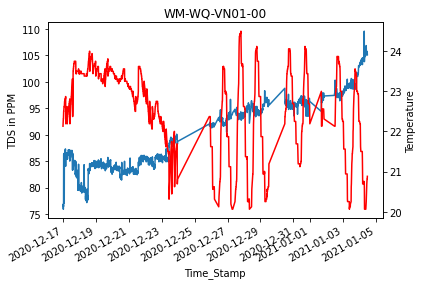

In [24]:
df_plot_main=df_plot.set_index('Time_Stamp')
ax1 = df_plot_main["TDSwithT"].plot()
plt.ylabel("TDS in PPM")
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df_plot_main["Temperature"].plot(ax=ax2, color="red")
plt.ylabel("Temperature")
plt.title("WM-WQ-VN01-00")
plt.savefig('WM-WQ-VN01-00', dpi=600)

In [42]:
df_plot.describe()

,Temperature,TDS-Voltage,TDSwithoutT,TDSwithT,Water_Level
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000
mean,22.665736,0.204867,83.011722,86.914819,3.731874
std,1.008870,0.010466,3.935660,4.853836,0.241760
min,20.060000,0.180000,72.010000,75.910000,3.330000
25%,22.130000,0.200000,80.550000,83.675000,3.540000
50%,22.940000,0.200000,81.910000,85.220000,3.690000
75%,23.440000,0.210000,85.770000,92.010000,3.890000
max,24.500000,0.230000,93.760000,98.290000,4.810000


# Plotting 1 Day Data :

In [54]:
df_oneday=df_plot_main.tail(173)

In [55]:
df_oneday.describe()

,Temperature,TDS-Voltage,TDSwithoutT,TDSwithT,Water_Level
count,173.000000,173.000000,173.000000,173.000000,173.000000
mean,21.782081,0.234104,94.291908,100.420173,6.249306
std,1.164421,0.006983,2.534052,2.737199,0.476282
min,20.060000,0.220000,89.720000,96.390000,4.910000
25%,20.750000,0.230000,92.270000,98.560000,5.920000
50%,21.560000,0.240000,94.640000,99.170000,6.320000
75%,22.940000,0.240000,96.340000,103.070000,6.580000
max,23.870000,0.250000,100.780000,109.540000,6.990000


Text(0.5, 1.0, 'TDS Variation in One day')

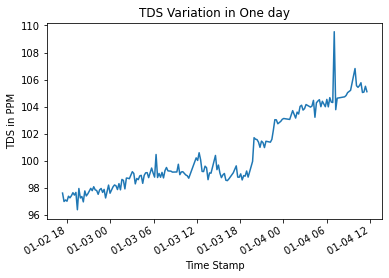

In [56]:
df_oneday["TDSwithT"].plot()
plt.xlabel("Time Stamp")
plt.ylabel("TDS in PPM")
plt.title("TDS Variation in One day")

Text(0.5, 1.0, 'Temperature Variation in One day')

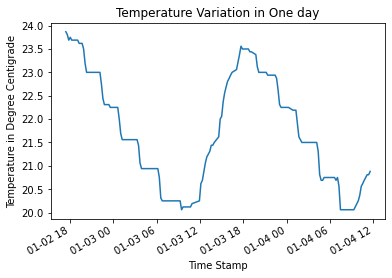

In [57]:
df_oneday["Temperature"].plot()
plt.xlabel("Time Stamp")
plt.ylabel("Temperature in Degree Centigrade")
plt.title("Temperature Variation in One day")

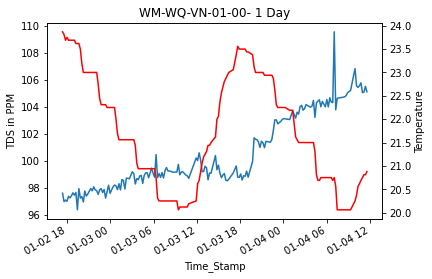

In [58]:

ax1 = df_oneday["TDSwithT"].plot()
plt.ylabel("TDS in PPM")
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df_oneday["Temperature"].plot(ax=ax2, color="red")
plt.ylabel("Temperature")
plt.title("WM-WQ-VN-01-00- 1 Day")
plt.savefig('WM-WQ-VN-01-00- 1 Day', dpi=600)

Text(0.5, 1.0, 'Water Level Variation in One day')

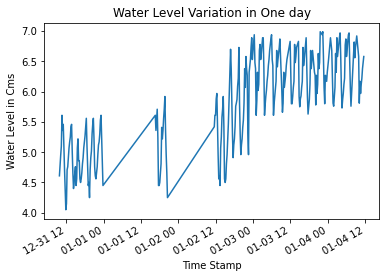

In [30]:
df_oneday["Water_Level"].plot()
plt.xlabel("Time Stamp")
plt.ylabel("Water Level in Cms")
plt.title("Water Level Variation in One day")

In [31]:
df_oneday.corr()

,Temperature,TDS-Voltage,TDSwithoutT,TDSwithT,Water_Level
Temperature,1.000000,0.259738,0.283131,-0.554993,-0.446864
TDS-Voltage,0.259738,1.000000,0.905823,0.578923,0.300710
TDSwithoutT,0.283131,0.905823,1.000000,0.640456,0.300183
TDSwithT,-0.554993,0.578923,0.640456,1.000000,0.613692
Water_Level,-0.446864,0.300710,0.300183,0.613692,1.000000
